<a href="https://colab.research.google.com/github/MarkLimmage/AustralianSharePrices/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import json
import csv
from io import StringIO
from bs4 import BeautifulSoup
import requests
import pandas as pd
from tqdm.notebook import tqdm

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import dateutil.parser as dp
import time
import math

from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVC
from sklearn import svm


from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
motley_9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MA5851/assessments/A2/motley_12.csv')

motley_10 = motley_9[['pc', 'category', 
        'body_Positive', 'body_Negative', 
       'body_Uncertainty', 'body_Litigious',
       'body_Strong_Modal', 
       'body_Weak_Modal', 'body_Constraining',
       'title_Positive', 'title_Negative',
       'title_Uncertainty', 'title_Litigious', 'title_Strong_Modal',
       'title_Weak_Modal', 'title_Constraining', 'key_Positive',
       'key_Negative', 'key_Uncertainty', 'key_Litigious', 'key_Strong_Modal',
       'key_Weak_Modal', 'key_Constraining'   ]]

motley_10['sum'] = motley_10[['body_Positive', 'body_Negative', 
       'body_Uncertainty', 'body_Litigious',
       'body_Strong_Modal', 
       'body_Weak_Modal', 'body_Constraining',
       'title_Positive', 'title_Negative',
       'title_Uncertainty', 'title_Litigious', 'title_Strong_Modal',
       'title_Weak_Modal', 'title_Constraining', 'key_Positive',
       'key_Negative', 'key_Uncertainty', 'key_Litigious', 'key_Strong_Modal',
       'key_Weak_Modal', 'key_Constraining'  ]].sum(axis=1)

motley_10['category'] = pd.factorize(motley_10['category'])[0]
print('Before dropping:', len(motley_10))
motley_10 = motley_10.drop(motley_10[motley_10['sum'] == 0 ].index)
print('After dropping for missing X:', len(motley_10))
motley_10 = motley_10.drop(motley_10[motley_10['pc'] == 0 ].index)
print('After dropping for missing y:', len(motley_10))
motley_10 = motley_10[motley_10['pc'].notna()]
print('After dropping for nan y:', len(motley_10))


Before dropping: 42648
After dropping for missing X: 17321
After dropping for missing y: 16883
After dropping for nan y: 15819


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
X = motley_10[[ 
        'body_Positive', 'body_Negative', 
       'body_Uncertainty', 'body_Litigious',
       'body_Strong_Modal', 
       'body_Weak_Modal', 'body_Constraining',
       'title_Positive', 'title_Negative',
       'title_Uncertainty', 'title_Litigious', 'title_Strong_Modal',
       'title_Weak_Modal', 'title_Constraining', 'key_Positive',
       'key_Negative', 'key_Uncertainty', 'key_Litigious', 'key_Strong_Modal',
       'key_Weak_Modal', 'key_Constraining' ]]

y = motley_10[['pc']].to_numpy()

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [ ]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [ ]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [ ]:
np.any( np.isnan(X_train) ), np.all( np.isfinite(X_train)), np.any( np.isnan(y_train) ), np.all( np.isfinite(y_train))



(False, True, False, True)

In [ ]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model=[]

for ix, svr in enumerate(svrs):
  model.append( svr.fit(X_train, y_train).score(X_test, y_test  ) )
  





In [ ]:
model

[{-0.016553956328738018}, {-0.0008984232364355194}, {-0.04339494553816281}]

# OK Try classifier

In [ ]:
X = motley_10[[ 
       'body_Positive', 'body_Negative', 
       'body_Uncertainty', 'body_Litigious',
       'body_Strong_Modal', 
       'body_Weak_Modal', 'body_Constraining',
       'title_Positive', 'title_Negative',
       'title_Uncertainty', 'title_Litigious', 'title_Strong_Modal',
       'title_Weak_Modal', 'title_Constraining', 'key_Positive',
       'key_Negative', 'key_Uncertainty', 'key_Litigious', 'key_Strong_Modal',
       'key_Weak_Modal', 'key_Constraining' ]]



y = motley_10[['pc']]

def convert(x):
  if(x<0):
    return -1
  if(x==0):
    return 0
  if(x>0):
    return 1


y['pc'] = y['pc'].apply( lambda x: convert(x) )

y=y.to_numpy()


from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10, random_state=1)
y_train = y_train.ravel()
y_test = y_test.ravel()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:

C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X_train, y_train) for clf in models)



In [ ]:
model = svm.SVC(kernel="linear", C=C).fit(X_train, y_train)

In [ ]:
model.score(X_test,y_test)

0.5050568900126422

## Try with just positive and negatives


In [ ]:
X = motley_10[[ 
'body_Positive', 'body_Negative', 
       'body_Uncertainty', 'body_Litigious',
       'body_Strong_Modal', 
       'body_Weak_Modal', 'body_Constraining',
       'title_Positive', 'title_Negative',
       'title_Uncertainty', 'title_Litigious', 'title_Strong_Modal',
       'title_Weak_Modal', 'title_Constraining', 'key_Positive',
       'key_Negative', 'key_Uncertainty', 'key_Litigious', 'key_Strong_Modal',
       'key_Weak_Modal', 'key_Constraining']]



y = motley_10[['pc']]

def convert(x):
  if(x<0):
    return -1
  if(x==0):
    return 0
  if(x>0):
    return 1


y['pc'] = y['pc'].apply( lambda x: convert(x) )

y=y.to_numpy()


from sklearn import preprocessing
scaler = preprocessing.RobustScaler().fit(X)
X_scaled = scaler.transform(X)

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10, random_state=1)
y_train = y_train.ravel()
y_test = y_test.ravel()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:

C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(decision_function_shape='ovo', C=C),
    svm.SVC(decision_function_shape='ovr', C=C),
    svm.NuSVC(kernel="rbf", gamma=0.7),
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
for clf in models:
  print(clf)
  print(clf.fit(X_train, y_train).score(X_test,y_test)) 
  print('--------------------------------')


SVC(decision_function_shape='ovo')
0.5120101137800253
--------------------------------
SVC()
0.5120101137800253
--------------------------------
NuSVC(gamma=0.7)
0.49873577749683945
--------------------------------
SVC(kernel='linear')
0.5050568900126422
--------------------------------
LinearSVC(max_iter=10000)
0.5050568900126422
--------------------------------
SVC(gamma=0.7)
0.5126422250316056
--------------------------------
SVC(gamma='auto', kernel='poly')
0.5050568900126422
--------------------------------


In [ ]:
# decision Tree


models = (
  DecisionTreeRegressor(max_depth=2),
  DecisionTreeRegressor(max_depth=5)
)
for clf in models:
  print(clf)
  print(clf.fit(X_train, y_train).score(X_test,y_test)) 
  print('--------------------------------')

DecisionTreeRegressor(max_depth=2)
0.0009756872003315875
--------------------------------
DecisionTreeRegressor(max_depth=5)
-0.018126477666972507
--------------------------------


## Ok now try neural net

In [ ]:
models = (
    MLPClassifier(random_state=1, 
                  max_iter=300, 
                  learning_rate='adaptive', 
                  early_stopping=False,
                  verbose=False ).fit(X_train, y_train),
    svm.SVC(decision_function_shape='ovr', C=C),
)
for clf in models:
  print(clf)
  print(clf.fit(X_train, y_train).score(X_test,y_test)) 
  print('--------------------------------')



learning on dataset All features scaled
training: sgd constant learning-rate
MLPClassifier(learning_rate_init=0.15, max_iter=1000, momentum=0,
              random_state=0, solver='sgd')
Test set score: 0.524652
Training set loss: 0.693236
---------------------------------------
training: lbfgs constant learning-rate
MLPClassifier(learning_rate_init=0.15, max_iter=1000, momentum=0,
              random_state=0, solver='lbfgs')
Test set score: 0.487990
Training set loss: 0.687083
---------------------------------------
training: adam
MLPClassifier(learning_rate_init=0.1, max_iter=1000, random_state=0)
Test set score: 0.508217
Training set loss: 0.694267
---------------------------------------


AttributeError: ignored

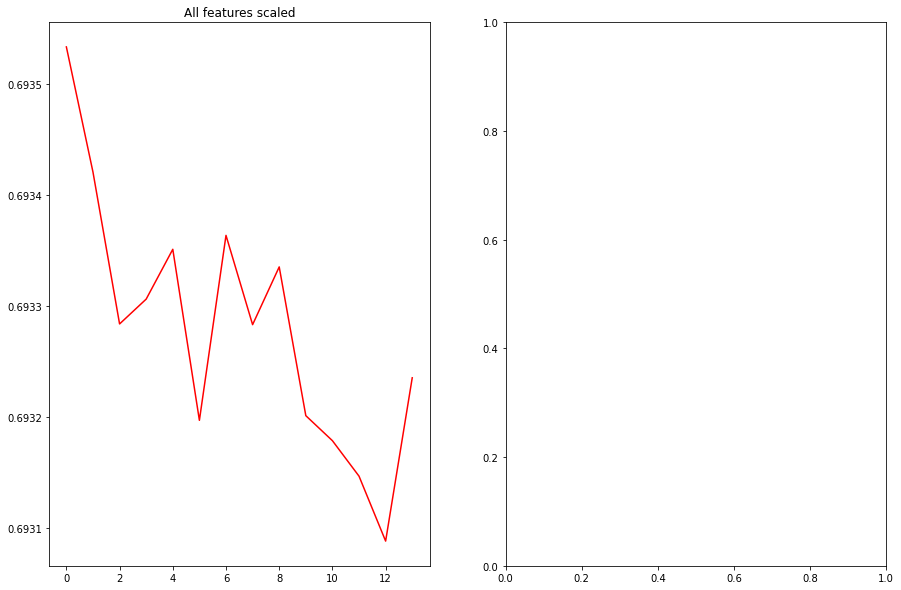

In [ ]:


# different learning rate schedules and momentum parameters
params = [
    {
        "solver": "sgd",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.15,
        
    },
    {
        "solver": "lbfgs",
        "learning_rate": "constant",
        "momentum": 0,
        "learning_rate_init": 0.15,
    },

    {"solver": "adam",
      "learning_rate": "constant",
      "momentum": 0,
      "learning_rate_init": 0.15},
]  

labels = [
    "sgd constant learning-rate",
    "lbfgs constant learning-rate",    
    "adam",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"}
]


def plot_on_dataset(X, y, X_test, y_test, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)

    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 1000

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore", category=ConvergenceWarning, module="sklearn"
            )
            mlp.fit(X, y)

        mlps.append(mlp)
        print(mlp)
        print("Test set score: %f" % mlp.score(X_test, y_test))
        print("Training set loss: %f" % mlp.loss_)
        print('---------------------------------------')
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(1, 2, figsize=(15, 10))
# load / generate some toy datasets
data_sets = [(X_train, y_train, X_test, y_test)
              ]

for ax, data, name in zip(
    axes.ravel(), data_sets, ["All features scaled", ]
):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

In [ ]:
import re
import json
import csv
from io import StringIO
from bs4 import BeautifulSoup
import requests
import pandas as pd
from tqdm.notebook import tqdm

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import dateutil.parser as dp
import time
import math

from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVC
from sklearn import svm


from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report

motley_9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MA5851/assessments/A2/motley_12.csv')

motley_10 = motley_9[['pc', 'category', 
        'body_Positive', 'body_Negative', 
       'body_Uncertainty', 'body_Litigious',
       'body_Strong_Modal', 
       'body_Weak_Modal', 'body_Constraining',
       'title_Positive', 'title_Negative',
       'title_Uncertainty', 'title_Litigious', 'title_Strong_Modal',
       'title_Weak_Modal', 'title_Constraining', 'key_Positive',
       'key_Negative', 'key_Uncertainty', 'key_Litigious', 'key_Strong_Modal',
       'key_Weak_Modal', 'key_Constraining'   ]]

motley_10['sum'] = motley_10[['body_Positive', 'body_Negative', 
       'body_Uncertainty', 'body_Litigious',
       'body_Strong_Modal', 
       'body_Weak_Modal', 'body_Constraining',
       'title_Positive', 'title_Negative',
       'title_Uncertainty', 'title_Litigious', 'title_Strong_Modal',
       'title_Weak_Modal', 'title_Constraining', 'key_Positive',
       'key_Negative', 'key_Uncertainty', 'key_Litigious', 'key_Strong_Modal',
       'key_Weak_Modal', 'key_Constraining'  ]].sum(axis=1)

motley_10['category'] = pd.factorize(motley_10['category'])[0]

print('Before dropping:', len(motley_10))

motley_10 = motley_10.drop(motley_10[motley_10['sum'] == 0 ].index)

print('After dropping for missing X:', len(motley_10))

motley_10 = motley_10.drop(motley_10[motley_10['pc'] == 0 ].index)

print('After dropping for missing y:', len(motley_10))


motley_10 = motley_10[motley_10['pc'].notna()]
print('After dropping for nan y:', len(motley_10))

X = motley_10[[ 
       'body_Positive', 'body_Negative', 
       'body_Uncertainty', 'body_Litigious',
       'body_Strong_Modal', 
       'body_Weak_Modal', 'body_Constraining',
       'title_Positive', 'title_Negative',
       'title_Uncertainty', 'title_Litigious', 'title_Strong_Modal',
       'title_Weak_Modal', 'title_Constraining', 'key_Positive',
       'key_Negative', 'key_Uncertainty', 'key_Litigious', 'key_Strong_Modal',
       'key_Weak_Modal', 'key_Constraining' ]]



y = motley_10[['pc']]

def convert(x):
  if(x<0):
    return -1
  if(x==0):
    return 0
  if(x>0):
    return 1


y['pc'] = y['pc'].apply( lambda x: convert(x) )

y=y.to_numpy()


from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10, random_state=1)
y_train = y_train.ravel()
y_test = y_test.ravel()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Before dropping: 42648
After dropping for missing X: 17321
After dropping for missing y: 16883
After dropping for nan y: 15819


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [ ]:
#Grid search hyperparameters

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=0)

param_grid = {
    'hidden_layer_sizes': [ (7,), (21,7), (48,21,7,),   ],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd','adam'],
    'alpha': [ 0.01, .001, .0001],
    'learning_rate': ['constant'],
}

model = MLPClassifier(random_state=1, 
                  max_iter=600, 
                  early_stopping=False,
                  verbose=False,
                  momentum=0,
                  learning_rate_init= 0.15, )


search = GridSearchCV(estimator=model, param_grid=param_grid, 
                      scoring="roc_auc", cv=cv, verbose=3)
search.fit(X_train, y_train)

Fitting 20 folds for each of 36 candidates, totalling 720 fits
[CV 1/20] END activation=tanh, alpha=0.01, hidden_layer_sizes=(7,), learning_rate=constant, solver=sgd;, score=0.494 total time=   1.0s
[CV 2/20] END activation=tanh, alpha=0.01, hidden_layer_sizes=(7,), learning_rate=constant, solver=sgd;, score=0.495 total time=   1.0s
[CV 3/20] END activation=tanh, alpha=0.01, hidden_layer_sizes=(7,), learning_rate=constant, solver=sgd;, score=0.511 total time=   1.0s
[CV 4/20] END activation=tanh, alpha=0.01, hidden_layer_sizes=(7,), learning_rate=constant, solver=sgd;, score=0.488 total time=   1.0s
[CV 5/20] END activation=tanh, alpha=0.01, hidden_layer_sizes=(7,), learning_rate=constant, solver=sgd;, score=0.504 total time=   1.4s
[CV 6/20] END activation=tanh, alpha=0.01, hidden_layer_sizes=(7,), learning_rate=constant, solver=sgd;, score=0.497 total time=   1.0s
[CV 7/20] END activation=tanh, alpha=0.01, hidden_layer_sizes=(7,), learning_rate=constant, solver=sgd;, score=0.519 tota

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=10, random_state=0),
             estimator=MLPClassifier(learning_rate_init=0.15, max_iter=600,
                                     momentum=0, random_state=1),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.01, 0.001, 0.0001],
                         'hidden_layer_sizes': [(7,), (21, 7), (48, 21, 7)],
                         'learning_rate': ['constant'],
                         'solver': ['sgd', 'adam']},
             scoring='roc_auc', verbose=3)

In [ ]:
print('Best parameters found:\n', search.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (21, 7), 'learning_rate': 'constant', 'solver': 'sgd'}


In [ ]:
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.496 (+/-0.032) for {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (7,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.498 (+/-0.026) for {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (7,), 'learning_rate': 'constant', 'solver': 'adam'}
0.502 (+/-0.026) for {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (21, 7), 'learning_rate': 'constant', 'solver': 'sgd'}
0.497 (+/-0.036) for {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (21, 7), 'learning_rate': 'constant', 'solver': 'adam'}
0.501 (+/-0.026) for {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (48, 21, 7), 'learning_rate': 'constant', 'solver': 'sgd'}
0.498 (+/-0.037) for {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (48, 21, 7), 'learning_rate': 'constant', 'solver': 'adam'}
0.496 (+/-0.032) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (7,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.504 (+/-0.031) for {'activation': 'tanh', '

In [ ]:
y_test, y_pred = y_test , search.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_test, y_pred))

Results on the test set:
              precision    recall  f1-score   support

          -1       0.54      0.21      0.30       804
           1       0.50      0.81      0.62       778

    accuracy                           0.51      1582
   macro avg       0.52      0.51      0.46      1582
weighted avg       0.52      0.51      0.46      1582



In [ ]:
import joblib

#save your model or results
joblib.dump(search, '/content/drive/MyDrive/Colab Notebooks/MA5851/assessments/A3/search.pkl')



['/content/drive/MyDrive/Colab Notebooks/MA5851/assessments/A3/search.pkl']

In [ ]:
#load your model for further usage
joblib.load("model_file_name.pkl")